In [127]:
import numpy as np
import pandas as pd
import seaborn as sns

In [128]:
df=pd.read_csv('/content/data_version_4.csv')
df.head()

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type,area_room_ratio
0,3,52061409,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1361.0,11021.0,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses,453.666667
1,4,52010487,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",New Property,3812.0,12461.0,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses,635.333333
2,5,42644685,Rawalpindi,2.0,3.0,3.0,1.0,1.0,1.0,2.25,For Sale,"Askari 14, Rawalpindi, Punjab,",Moderately Old,2722.0,8266.0,Askari 14,Punjab,Askari 14,Houses,907.333333
3,6,52099738,Rawalpindi,3.0,2.0,2.0,0.0,1.0,1.0,1.15,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1171.0,9821.0,Bahria Town,Punjab,Bahria Town Rawalpindi,Flats,585.500000
4,7,51956291,Rawalpindi,1.0,4.0,5.0,0.0,0.0,0.0,1.75,For Sale,"Defence Road, Rawalpindi, Punjab,",Undefined,1361.0,12858.0,Defence Road,Punjab,Defence Road,Houses,340.250000


In [129]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [130]:
# some columns drop
df.drop(['House Number','society','price_per_sqft','Location','area_room_ratio','Purpose'],axis=1,inplace=True)

In [131]:
df.head()

,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Age Possession,area,colony,province,property Type
0,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,Relatively New,1361.0,Bahria Town Phase 8,Punjab,Houses
1,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,New Property,3812.0,Bahria Greens,Punjab,Houses
2,Rawalpindi,2.0,3.0,3.0,1.0,1.0,1.0,2.25,Moderately Old,2722.0,Askari 14,Punjab,Houses
3,Rawalpindi,3.0,2.0,2.0,0.0,1.0,1.0,1.15,Relatively New,1171.0,Bahria Town,Punjab,Flats
4,Rawalpindi,1.0,4.0,5.0,0.0,0.0,0.0,1.75,Undefined,1361.0,Defence Road,Punjab,Houses


In [132]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['Karachi', 'Lahore', 'Rawalpindi'], dtype=object)]
[array(['Moderately Old', 'New Property', 'Old Property', 'Relatively New',
       'Undefined', 'Under Construction'], dtype=object)]
[array(['Adiala Road', 'Air Avenue ', 'Airline Housing Society',
       'Airport Housing Society', 'Airport Housing Society ', 'Al Ahmad',
       'Al Ahmad Haram Garden', 'Al Ahmad Rehman Garden Phase 2',
       'Al Ahmad Rehman Garden Phase 4', 'Al Ahmadlama Iqbal Town',
       'Architects Engineers Housing Society', 'Aria Mohalla',
       'Askari 10', 'Askari 10 ', 'Askari 11 ', 'Askari 13', 'Askari 14',
       'Askari 4', 'Askari 5 ', 'Askari 6', 'Awan Market', 'Bahadurabad',
       'Bahria Greens ', 'Bahria Heights', 'Bahria Intellectual Village',
       'Bahria Orchard', 'Bahria Orchard Phase 1 ',
       'Bahria Orchard Phase 2', 'Bahria Paradise',
       'Bahria Safari Valley ', 'Bahria Square Commercial', 'Bahria Town',
       'Bahria Town ', 'Bahria Town Phase 2', 'Bahria Town Phase 3',
 

In [133]:
X_label

,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Age Possession,area,colony,province,property Type
0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,1361.0,40.0,0.0,1.0
1,2.0,3.0,6.0,6.0,1.0,2.0,1.0,1.0,3812.0,22.0,0.0,1.0
2,2.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,2722.0,16.0,0.0,1.0
3,2.0,3.0,2.0,2.0,0.0,1.0,1.0,3.0,1171.0,32.0,0.0,0.0
4,2.0,1.0,4.0,5.0,0.0,0.0,0.0,4.0,1361.0,77.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,1701.0,112.0,1.0,0.0
755,0.0,1.0,5.0,5.0,1.0,1.0,0.0,1.0,4500.0,86.0,1.0,1.0
756,0.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,900.0,136.0,1.0,3.0
757,0.0,1.0,3.0,3.0,0.0,1.0,1.0,3.0,1800.0,136.0,1.0,2.0


## correation Analysis

<Axes: >

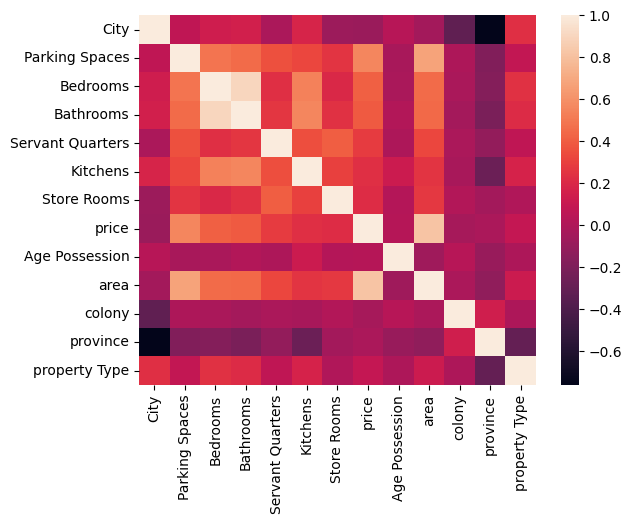

In [134]:
sns.heatmap(data_label_encoded.corr())

In [135]:
fi_df1=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,Parking Spaces,0.554843
1,Bedrooms,0.410502
2,Bathrooms,0.394400
3,Servant Quarters,0.277837
4,Kitchens,0.233874
5,Store Rooms,0.222161
6,price,1.000000
7,Age Possession,0.026683
8,area,0.820506
9,colony,-0.037577


### Random Forest Feature Importance

In [136]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
8,area,0.739396
9,colony,0.063667
3,Bathrooms,0.038729
4,Servant Quarters,0.035887
7,Age Possession,0.034213
1,Parking Spaces,0.022328
0,City,0.017014
2,Bedrooms,0.016419
5,Kitchens,0.013816
6,Store Rooms,0.012546


### Gradient Boosting Feature importances

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
8,area,0.788410
9,colony,0.040086
4,Servant Quarters,0.029496
3,Bathrooms,0.028741
1,Parking Spaces,0.026022
0,City,0.024156
2,Bedrooms,0.021216
7,Age Possession,0.020055
6,Store Rooms,0.011713
10,province,0.006679


### Permutation Importance

In [138]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
8,area,1.219447
1,Parking Spaces,0.035410
0,City,0.033296
2,Bedrooms,0.031735
9,colony,0.027779
5,Kitchens,0.016369
3,Bathrooms,0.010699
7,Age Possession,0.007379
4,Servant Quarters,0.005315
10,province,0.001957


### LASSO
- it is regression model

In [139]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
8,area,3.445196
10,province,0.649099
7,Age Possession,0.375958
0,City,0.212477
2,Bedrooms,0.209744
5,Kitchens,0.088399
4,Servant Quarters,0.062649
11,property Type,0.030856
1,Parking Spaces,-0.000000
6,Store Rooms,-0.024825


### RFE
- it is tree model and most importand technique for feature importance

In [140]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
8,area,0.737557
9,colony,0.061942
3,Bathrooms,0.036013
4,Servant Quarters,0.035885
7,Age Possession,0.030470
1,Parking Spaces,0.028629
2,Bedrooms,0.018931
0,City,0.016214
5,Kitchens,0.015190
6,Store Rooms,0.012759


### Linear Regression Weights

In [141]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
8,area,3.478306
10,province,0.698420
7,Age Possession,0.392429
2,Bedrooms,0.303987
0,City,0.259289
5,Kitchens,0.107272
4,Servant Quarters,0.080924
11,property Type,0.039844
1,Parking Spaces,-0.022083
6,Store Rooms,-0.037391


### SHAP

In [142]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-2.44250745e-02, -3.17050340e-02, -8.46611904e-02, ...,
        -1.00040270e-01, -1.84043013e-02, -2.04064440e-03],
       [-1.50688158e-01, -3.94435830e-02,  5.89744217e-02, ...,
        -2.41634470e-02, -7.15531435e-02, -4.62356406e-03],
       [-1.06621282e-01, -7.91743357e-02, -2.81787312e-01, ...,
        -2.03785774e-01, -3.38019216e-02, -9.47611058e-03],
       ...,
       [ 1.56643771e-01, -1.05044455e-02, -9.85641160e-02, ...,
        -6.46091020e-03,  1.41600802e-01,  1.77220987e-01],
       [ 2.10770135e-01, -2.83825037e-02, -1.42524229e-01, ...,
         3.92139569e-01,  1.49992017e-01,  4.00938113e-02],
       [ 2.84101843e-01, -2.10369662e-04, -5.35699958e-02, ...,
         9.39416744e-02,  2.28676113e-01,  8.17640098e-02]])

In [143]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
8,area,2.556739
9,colony,0.263800
0,City,0.169974
7,Age Possession,0.148532
3,Bathrooms,0.126422
2,Bedrooms,0.090036
4,Servant Quarters,0.074443
10,province,0.063984
1,Parking Spaces,0.061272
5,Kitchens,0.055024


In [144]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [145]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
Parking Spaces,0.554843,0.022328,0.026022,0.035410,-0.000000,0.028629,-0.022083,0.061272
Bedrooms,0.410502,0.016419,0.021216,0.031735,0.209744,0.018931,0.303987,0.090036
Bathrooms,0.394400,0.038729,0.028741,0.010699,-0.030358,0.036013,-0.141293,0.126422
Servant Quarters,0.277837,0.035887,0.029496,0.005315,0.062649,0.035885,0.080924,0.074443
Kitchens,0.233874,0.013816,0.003024,0.016369,0.088399,0.015190,0.107272,0.055024
Store Rooms,0.222161,0.012546,0.011713,-0.005060,-0.024825,0.012759,-0.037391,0.044701
Age Possession,0.026683,0.034213,0.020055,0.007379,0.375958,0.030470,0.392429,0.148532
area,0.820506,0.739396,0.788410,1.219447,3.445196,0.737557,3.478306,2.556739
colony,-0.037577,0.063667,0.040086,0.027779,-0.134292,0.061942,-0.137826,0.263800


In [146]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
Parking Spaces,0.186232,0.022714,0.026666,0.026238,-0.000000,0.029101,-0.004637,0.017516
Bedrooms,0.137784,0.016703,0.021741,0.023515,0.044890,0.019243,0.063828,0.025740
Bathrooms,0.132380,0.039399,0.029453,0.007928,-0.006497,0.036606,-0.029667,0.036142
Servant Quarters,0.093255,0.036508,0.030226,0.003938,0.013408,0.036476,0.016992,0.021282
Kitchens,0.078499,0.014055,0.003099,0.012129,0.018919,0.015440,0.022524,0.015730
Store Rooms,0.074568,0.012763,0.012003,-0.003749,-0.005313,0.012969,-0.007851,0.012779
Age Possession,0.008956,0.034806,0.020552,0.005467,0.080463,0.030972,0.082398,0.042462
area,0.275401,0.752194,0.807926,0.903577,0.737346,0.749713,0.730339,0.730921
colony,-0.012612,0.064769,0.041078,0.020584,-0.028741,0.062963,-0.028939,0.075415


In [147]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
area,0.788866
colony,0.052962
Bathrooms,0.029905
Age Possession,0.026852
Servant Quarters,0.025686
Parking Spaces,0.024447
Bedrooms,0.021388
Kitchens,0.012091
Store Rooms,0.009353


In [148]:
X_label

,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Age Possession,area,colony,province,property Type
0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,1361.0,40.0,0.0,1.0
1,2.0,3.0,6.0,6.0,1.0,2.0,1.0,1.0,3812.0,22.0,0.0,1.0
2,2.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,2722.0,16.0,0.0,1.0
3,2.0,3.0,2.0,2.0,0.0,1.0,1.0,3.0,1171.0,32.0,0.0,0.0
4,2.0,1.0,4.0,5.0,0.0,0.0,0.0,4.0,1361.0,77.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,1701.0,112.0,1.0,0.0
755,0.0,1.0,5.0,5.0,1.0,1.0,0.0,1.0,4500.0,86.0,1.0,1.0
756,0.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,900.0,136.0,1.0,3.0
757,0.0,1.0,3.0,3.0,0.0,1.0,1.0,3.0,1800.0,136.0,1.0,2.0


In [149]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

0.6579208371897709

In [150]:
df.columns

Index(['City', 'Parking Spaces', 'Bedrooms', 'Bathrooms', 'Servant Quarters',
       'Kitchens', 'Store Rooms', 'price', 'Age Possession', 'area', 'colony',
       'province', 'property Type'],
      dtype='object')

In [155]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['province']), y_label, cv=5, scoring='r2')
scores.mean()

0.6516522769882167

In [156]:
export_df = X_label
export_df['price'] = y_label

In [157]:
export_df

,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Age Possession,area,colony,province,property Type,price
0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,1361.0,40.0,0.0,1.0,1.50
1,2.0,3.0,6.0,6.0,1.0,2.0,1.0,1.0,3812.0,22.0,0.0,1.0,4.75
2,2.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,2722.0,16.0,0.0,1.0,2.25
3,2.0,3.0,2.0,2.0,0.0,1.0,1.0,3.0,1171.0,32.0,0.0,0.0,1.15
4,2.0,1.0,4.0,5.0,0.0,0.0,0.0,4.0,1361.0,77.0,0.0,1.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,1701.0,112.0,1.0,0.0,2.29
755,0.0,1.0,5.0,5.0,1.0,1.0,0.0,1.0,4500.0,86.0,1.0,1.0,10.50
756,0.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,900.0,136.0,1.0,3.0,2.20
757,0.0,1.0,3.0,3.0,0.0,1.0,1.0,3.0,1800.0,136.0,1.0,2.0,3.50


In [158]:
export_df.to_csv('feature_selection.csv', index=False)